In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('titles.csv')
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [3]:
# 나라 이름에서 텍스트만 남기고 괄호, 따옴표 없애기. / 첫 국가만 담기
df['production_countries'] = df['production_countries'].str.replace("[","").str.replace("'",'').str.replace("'","").str.replace("]","").str.split(",").str[0]
df['production_countries']

0       US
1       US
2       US
3       GB
4       GB
        ..
5845    NG
5846      
5847    CO
5848    US
5849      
Name: production_countries, Length: 5850, dtype: object

In [4]:
df = df.drop(columns={"id", "description", "age_certification", "imdb_id"})
df

,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],US,1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",US,NaN,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",US,NaN,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",GB,NaN,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']",GB,NaN,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...
5845,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",NG,NaN,6.8,45.0,1.466,NaN
5846,C/O Kaadhal,MOVIE,2021,134,['drama'],,NaN,7.7,348.0,NaN,NaN
5847,Lokillo,MOVIE,2021,90,['comedy'],CO,NaN,3.8,68.0,26.005,6.300
5848,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,37,[],US,NaN,NaN,NaN,1.296,10.000


In [5]:
# seasons 결측치 1.0으로 대체
df["seasons"].fillna(1.0, inplace=True)

In [6]:
# y변수인 imdb_votes에서 결측치 제거
df = df[df['imdb_votes'] > 0]
df

,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",US,1.0,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",US,1.0,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",GB,1.0,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']",GB,1.0,7.7,72662.0,20.398,7.600
5,Monty Python's Flying Circus,SHOW,1969,30,"['comedy', 'european']",GB,4.0,8.8,73424.0,17.617,8.306
...,...,...,...,...,...,...,...,...,...,...,...
5843,My Bride,MOVIE,2021,93,"['romance', 'comedy', 'drama']",EG,1.0,5.0,327.0,2.545,5.300
5845,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",NG,1.0,6.8,45.0,1.466,NaN
5846,C/O Kaadhal,MOVIE,2021,134,['drama'],,1.0,7.7,348.0,NaN,NaN
5847,Lokillo,MOVIE,2021,90,['comedy'],CO,1.0,3.8,68.0,26.005,6.300


In [7]:
df.isnull().sum()

title                     0
type                      0
release_year              0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score                0
imdb_votes                0
tmdb_popularity          73
tmdb_score              221
dtype: int64

In [8]:
# 결측치 제거
df.dropna(inplace=True)

In [9]:
df.shape

(5131, 11)

In [10]:
df['production_countries'].value_counts()

US    1908
IN     556
GB     269
JP     244
KR     190
      ... 
CU       1
GE       1
IR       1
QA       1
KE       1
Name: production_countries, Length: 93, dtype: int64

넷플릭스에 올라온 영화 중에 미국작품이 제일 많고, 그 다음은 인도, 영국, 일본, 한국 순이다.

In [11]:
# 생산한 영화/드라마가 많은 국가순으로 나열한 리스트 (미국이 1위, 인도가 2위, 영국이 3위)
country = df["production_countries"].value_counts().index
country

Index(['US', 'IN', 'GB', 'JP', 'KR', 'ES', 'CA', 'FR', '', 'MX', 'BR', 'DE',
       'TR', 'PH', 'CN', 'AU', 'IT', 'TW', 'ID', 'AR', 'PL', 'CO', 'NG', 'BE',
       'ZA', 'EG', 'HK', 'TH', 'NL', 'SE', 'LB', 'DK', 'CL', 'XX', 'IL', 'RU',
       'NO', 'MY', 'AE', 'AT', 'NZ', 'SG', 'IE', 'PE', 'SA', 'PS', 'RO', 'FI',
       'CZ', 'IS', 'PT', 'LU', 'GH', 'BG', 'JO', 'CH', 'UA', 'UY', 'BD', 'PK',
       'TZ', 'RS', 'MA', 'CM', 'PR', 'CD', 'VN', 'HU', 'GR', 'KW', 'GT', 'SU',
       'DZ', 'SN', 'IO', 'MU', 'MT', 'BT', 'Lebanon', 'NP', 'IQ', 'ZW', 'PY',
       'VE', 'HR', 'KH', 'TN', 'GL', 'CU', 'GE', 'IR', 'QA', 'KE'],
      dtype='object')

In [12]:
# 국가별 imdb_votes의 평균 점수
votes_per_country = [np.mean(df[df["production_countries"] == country[i]]["imdb_votes"]) for i in range(93)]
votes_per_country

[44535.879454926624,
 11693.789568345324,
 42993.14869888476,
 10959.725409836066,
 7204.868421052632,
 6726.688622754491,
 22545.903846153848,
 12368.538461538461,
 693.1875,
 3887.267326732673,
 2183.3777777777777,
 37066.44705882353,
 8664.30487804878,
 539.0769230769231,
 6151.154929577465,
 19400.478260869564,
 10283.076923076924,
 808.6428571428571,
 1505.0192307692307,
 1690.8653846153845,
 5191.605263157895,
 701.3421052631579,
 280.75,
 12156.387096774193,
 3260.344827586207,
 1747.7777777777778,
 19041.653846153848,
 1487.423076923077,
 2932.913043478261,
 8084.2,
 456.36842105263156,
 10642.25,
 1126.7333333333333,
 2248.133333333333,
 5417.357142857143,
 3627.4285714285716,
 10377.142857142857,
 667.3333333333334,
 30615.1,
 2484.222222222222,
 17212.666666666668,
 7346.111111111111,
 10197.111111111111,
 13886.625,
 1277.5714285714287,
 2715.6666666666665,
 5532.4,
 6552.8,
 9754.6,
 7014.2,
 2174.25,
 4693.0,
 27058.333333333332,
 16431.0,
 8552.666666666666,
 32977.33333

In [13]:
# 국가별 imdb_votes의 평균을 나타낸 표 (작품수가 많은 국가순)
nation = pd.DataFrame({"Country": country, "Average votes": votes_per_country})
nation

,Country,Average votes
0,US,44535.879455
1,IN,11693.789568
2,GB,42993.148699
3,JP,10959.725410
4,KR,7204.868421
...,...,...
88,CU,4859.000000
89,GE,3865.000000
90,IR,7104.000000
91,QA,1405.000000


많은 영화/드라마를 생산한다고 imdb_votes가 높은 것은 아님을 알 수 있다.

인도는 작품 수는 영국보다 2배 많지만, imdb_votes 평균은 한참 낮다. 


In [14]:
nation["Average votes"].sort_values(ascending=False)

76    527447.000000
68     58882.000000
0      44535.879455
2      42993.148699
67     39272.500000
          ...      
73       135.000000
86       128.000000
60        73.500000
84        64.000000
92        46.000000
Name: Average votes, Length: 93, dtype: float64

평균 관객수(imdb_votes)가 가장 높은 나라는 86번 (몰타), 그리고 92번 (그리스)라고 나온다.

이는 Troy라는 영화와 The Lost Daughter이라는 영화가 각각 몰타와 미국, 그리스와 미국의 합작품인데, 첫 국가명만 가져오는 바람에 생략된 결과이다.

이에 86번과 92번의 국적을 '미국'으로 수정한다.

In [15]:
df.loc[257, "production_countries"] = "US"
df.loc[4743, "production_countries"] = "US"

In [16]:
df.loc[257, "production_countries"], df.loc[4743, "production_countries"]

('US', 'US')

In [17]:
# 다시 국가별 평균 데이터프레임 만들기
votes_per_country = [np.mean(df[df["production_countries"] == country[i]]["imdb_votes"]) for i in range(93)]

nation = pd.DataFrame({"Country": country, "Average votes": votes_per_country})
nation

,Country,Average votes
0,US,44796.223560
1,IN,11693.789568
2,GB,42993.148699
3,JP,10959.725410
4,KR,7204.868421
...,...,...
88,CU,4859.000000
89,GE,3865.000000
90,IR,7104.000000
91,QA,1405.000000


In [18]:
# imdb_votes 평균이 높은 순서로 국가명 나열하기
rank_index = nation["Average votes"].sort_values(ascending=False).index

ranking = [nation.loc[i,"Country"] for i in rank_index] 

rank_num = list(nation["Average votes"].sort_values(ascending=False))

nation2 = pd.DataFrame({"Country": ranking, "Average votes": rank_num}) # 여기에 애초에 가중치 칼럼을 만들어야겠다.
nation2["Weight"] = list(range(92,-1,-1))

nation2

,Country,Average votes,Weight
0,US,44796.223560,92
1,GB,42993.148699,91
2,HU,39272.500000,90
3,DE,37066.447059,89
4,CH,32977.333333,88
...,...,...,...
88,TZ,73.500000,4
89,HR,64.000000,3
90,KE,46.000000,2
91,GR,NaN,1


미국, 영국, 헝가리, 독일, 스위스 작품일수록 평균 imdb_votes가 높았다.

이에 총 95개 국가 중 미국은 94점, 영국은 93점, 마지막인 그리스는 0점으로 가중치를 주었다. 

In [19]:
# genres에서 텍스트만 남기고 괄호, 따옴표 없애기. / 첫번째 장르만 남기기
df['genres'] = df['genres'].str.replace("[","").str.replace("'",'').str.replace("'","").str.replace("]","").str.split(",").str[0]
df['genres']

1           drama
2           drama
3         fantasy
4             war
5          comedy
          ...    
5838        drama
5842    animation
5843      romance
5847       comedy
5849       family
Name: genres, Length: 5131, dtype: object

In [20]:
# df["production countries"]칼럼을 숫자로 바꾸기
for i in nation2["Country"]:
    df["production_countries"] = df["production_countries"].replace(i, int(nation2[nation2["Country"]==i].loc[:, "Weight"]))

df    

,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,Taxi Driver,MOVIE,1976,114,drama,92,1.0,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,1972,109,drama,92,1.0,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,1975,91,fantasy,91,1.0,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,1967,150,war,91,1.0,7.7,72662.0,20.398,7.600
5,Monty Python's Flying Circus,SHOW,1969,30,comedy,91,4.0,8.8,73424.0,17.617,8.306
...,...,...,...,...,...,...,...,...,...,...,...
5838,Happiness Ever After,MOVIE,2021,99,drama,48,1.0,4.2,163.0,11.536,7.300
5842,Super Monsters: Once Upon a Rhyme,MOVIE,2021,25,animation,21,1.0,5.6,38.0,53.762,6.300
5843,My Bride,MOVIE,2021,93,romance,38,1.0,5.0,327.0,2.545,5.300
5847,Lokillo,MOVIE,2021,90,comedy,22,1.0,3.8,68.0,26.005,6.300


In [21]:
df["word_count"] = df.title.str.count('')-1
df["word_count"]

1       11
2       11
3       31
4       15
5       28
        ..
5838    20
5842    33
5843     8
5847     7
5849    34
Name: word_count, Length: 5131, dtype: int64

In [22]:
df

,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,word_count
1,Taxi Driver,MOVIE,1976,114,drama,92,1.0,8.2,808582.0,40.965,8.179,11
2,Deliverance,MOVIE,1972,109,drama,92,1.0,7.7,107673.0,10.010,7.300,11
3,Monty Python and the Holy Grail,MOVIE,1975,91,fantasy,91,1.0,8.2,534486.0,15.461,7.811,31
4,The Dirty Dozen,MOVIE,1967,150,war,91,1.0,7.7,72662.0,20.398,7.600,15
5,Monty Python's Flying Circus,SHOW,1969,30,comedy,91,4.0,8.8,73424.0,17.617,8.306,28
...,...,...,...,...,...,...,...,...,...,...,...,...
5838,Happiness Ever After,MOVIE,2021,99,drama,48,1.0,4.2,163.0,11.536,7.300,20
5842,Super Monsters: Once Upon a Rhyme,MOVIE,2021,25,animation,21,1.0,5.6,38.0,53.762,6.300,33
5843,My Bride,MOVIE,2021,93,romance,38,1.0,5.0,327.0,2.545,5.300,8
5847,Lokillo,MOVIE,2021,90,comedy,22,1.0,3.8,68.0,26.005,6.300,7


In [23]:
df["genres"].value_counts()

drama            1261
comedy           1192
documentation     548
thriller          343
action            328
animation         243
scifi             222
crime             220
romance           210
reality           154
family            100
horror            100
fantasy            79
music              47
war                42
history            21
western            15
sport               4
                    2
Name: genres, dtype: int64

In [24]:
df["imdb_votes"].sort_values(ascending=False)

237     2294231.0
97      2021343.0
216     1775990.0
645     1669067.0
94      1606270.0
          ...    
1175          6.0
2192          6.0
2798          5.0
4470          5.0
5257          5.0
Name: imdb_votes, Length: 5131, dtype: float64

In [25]:
genre_weight = df.groupby('genres')['imdb_votes'].median().sort_values(ascending=False)/82383.0
genre_weight

genres
horror           0.151724
war              0.110314
scifi            0.107413
western          0.105119
thriller         0.085455
action           0.061918
fantasy          0.055242
crime            0.053294
history          0.043407
romance          0.039498
drama            0.036500
                 0.035311
sport            0.032197
comedy           0.022292
documentation    0.016963
music            0.015707
family           0.011507
reality          0.009158
animation        0.006980
Name: imdb_votes, dtype: float64

In [26]:
df['genres_weight'] = df['genres'].map(genre_weight)
df

,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,word_count,genres_weight
1,Taxi Driver,MOVIE,1976,114,drama,92,1.0,8.2,808582.0,40.965,8.179,11,0.036500
2,Deliverance,MOVIE,1972,109,drama,92,1.0,7.7,107673.0,10.010,7.300,11,0.036500
3,Monty Python and the Holy Grail,MOVIE,1975,91,fantasy,91,1.0,8.2,534486.0,15.461,7.811,31,0.055242
4,The Dirty Dozen,MOVIE,1967,150,war,91,1.0,7.7,72662.0,20.398,7.600,15,0.110314
5,Monty Python's Flying Circus,SHOW,1969,30,comedy,91,4.0,8.8,73424.0,17.617,8.306,28,0.022292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,Happiness Ever After,MOVIE,2021,99,drama,48,1.0,4.2,163.0,11.536,7.300,20,0.036500
5842,Super Monsters: Once Upon a Rhyme,MOVIE,2021,25,animation,21,1.0,5.6,38.0,53.762,6.300,33,0.006980
5843,My Bride,MOVIE,2021,93,romance,38,1.0,5.0,327.0,2.545,5.300,8,0.039498
5847,Lokillo,MOVIE,2021,90,comedy,22,1.0,3.8,68.0,26.005,6.300,7,0.022292


In [27]:
df.to_csv("final.csv") # 전처리 완료 데이터

### x, y 선정

In [28]:
x = df.drop(columns = ['title', 'type', 'genres', 'imdb_votes'])
x

,release_year,runtime,production_countries,seasons,imdb_score,tmdb_popularity,tmdb_score,word_count,genres_weight
1,1976,114,92,1.0,8.2,40.965,8.179,11,0.036500
2,1972,109,92,1.0,7.7,10.010,7.300,11,0.036500
3,1975,91,91,1.0,8.2,15.461,7.811,31,0.055242
4,1967,150,91,1.0,7.7,20.398,7.600,15,0.110314
5,1969,30,91,4.0,8.8,17.617,8.306,28,0.022292
...,...,...,...,...,...,...,...,...,...
5838,2021,99,48,1.0,4.2,11.536,7.300,20,0.036500
5842,2021,25,21,1.0,5.6,53.762,6.300,33,0.006980
5843,2021,93,38,1.0,5.0,2.545,5.300,8,0.039498
5847,2021,90,22,1.0,3.8,26.005,6.300,7,0.022292


In [29]:
y = df['imdb_votes']
y

1       808582.0
2       107673.0
3       534486.0
4        72662.0
5        73424.0
          ...   
5838       163.0
5842        38.0
5843       327.0
5847        68.0
5849        18.0
Name: imdb_votes, Length: 5131, dtype: float64

### 정규화

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-5.72690608,  0.91059299,  0.81347258, ...,  1.18067421,
        -0.6347177 , -0.12912922],
       [-6.29550204,  0.78109812,  0.81347258, ...,  0.41407566,
        -0.6347177 , -0.12912922],
       [-5.86905507,  0.31491659,  0.76842452, ...,  0.85973193,
         1.27864609,  0.49329795],
       ...,
       [ 0.66979851,  0.36671453, -1.61912254, ..., -1.33017588,
        -0.92172227, -0.029557  ],
       [ 0.66979851,  0.28901761, -2.33989147, ..., -0.45805011,
        -1.01739046, -0.60098868],
       [ 0.66979851, -1.86059725, -2.38493953, ...,  2.76881523,
         1.56565066, -0.95916649]])

### train / test 분리

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) # 실행 시마다 결과가 달라지는 것 방지하기 위함
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4104, 9), (1027, 9), (4104,), (1027,))

### model 

In [32]:
from sklearn.linear_model import LinearRegression 
model1 = LinearRegression()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)

In [33]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)

In [34]:
import xgboost as xgb
model3 = xgb.XGBRegressor()
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)

$R^2$
- 0~1까지 수로 나타냄
- 1에 가까울수록 100%의 설명력을 가진 모델로 평가

RMSE
- RMSE(평균 제곱근 오차)의 값이 낮을수록 좋은 모델. 
- 완벽한 예측 모델(항상 정확한 예상 값을 예측하는 가상의 예측 모델)은 평균 제곱근 오차 값은 0

### 모델 평가 ($R^2$, rmse)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
print('model1', np.sqrt(mean_squared_error(y_test, pred1))) # RMSe
print('model1', r2_score(y_test, pred1)) # R^2
print('model2', np.sqrt(mean_squared_error(y_test, pred2)))
print('model2', r2_score(y_test, pred2))
print('model3', np.sqrt(mean_squared_error(y_test, pred3)))
print('model3', r2_score(y_test, pred3))

model1 104505.15111979604
model1 0.1681439404372811
model2 50352.356116069386
model2 0.8068866118478031
model3 54621.10037186017
model3 0.7727553438013073


하이퍼 파라미터 튜닝 없이 기본 모델로 예측했을 경우, RandomForestRegressor가 가장 높은 r2_score, 가장 낮은 rmse를 보였음
- r2_score: 0.8068866118478031
- rmse: 50352.356116069386

### 하이퍼 파라미터 튜닝

In [36]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

lr = LinearRegression()
rf = RandomForestRegressor()
xgb = xgb.XGBRegressor()

parameters1 = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]
              }

parameters2 = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
               {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
              ]

parameters3 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'], 'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7], 'min_child_weight': [4], 'subsample': [0.7],
              'colsample_bytree': [0.7], 'n_estimators': [500]
              }

model4 = GridSearchCV(lr, param_grid = parameters1, cv=5, verbose=1 , scoring = 'neg_mean_squared_error')
model5 = GridSearchCV(rf, param_grid = parameters2, cv=5, refit=True, verbose=1, scoring = 'neg_mean_squared_error')
model6 = GridSearchCV(xgb, param_grid = parameters3, cv=5, verbose=10, n_jobs=-1, scoring='neg_root_mean_squared_error')

model4.fit(x_train, y_train)
model5.fit(x_train, y_train)
model6.fit(x_train, y_train)

print('lr: ', model4.best_estimator_)
print('lr: ', model4.best_score_)
print('rf: ', model5.best_estimator_)
print('rf: ', model5.best_score_)
print('xgb: ', model6.best_estimator_)
print('xgb: ', model6.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[14:58:20] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
lr:  LinearRegression(normalize=False)
lr:  -7276466173.31117
rf:  RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=10)
rf:  -3226654542.0389037
xgb:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto

In [37]:
pred4 = model4.predict(x_test) # LR
print('model4', np.sqrt(mean_squared_error(y_test, pred4)))
print('model4', r2_score(y_test, pred4))

model4 104505.15111979604
model4 0.1681439404372811


In [38]:
pred5 = model5.predict(x_test) # RF
print('model5', np.sqrt(mean_squared_error(y_test, pred5)))
print('model5', r2_score(y_test, pred5))

model5 47696.83947784616
model5 0.8267185815918027


In [39]:
pred6 = model6.predict(x_test) # XGB
print('model6', np.sqrt(mean_squared_error(y_test, pred6)))
print('model6', r2_score(y_test, pred6))

model6 49770.81928538867
model6 0.8113215199941897


하이퍼 파라미터 튜닝 후, RandomForestRegressor가 더 높은 r2_score, 더 낮은 rmse를 보임
- r2_score: 0.8267185815918027
- rmse: 47696.83947784616

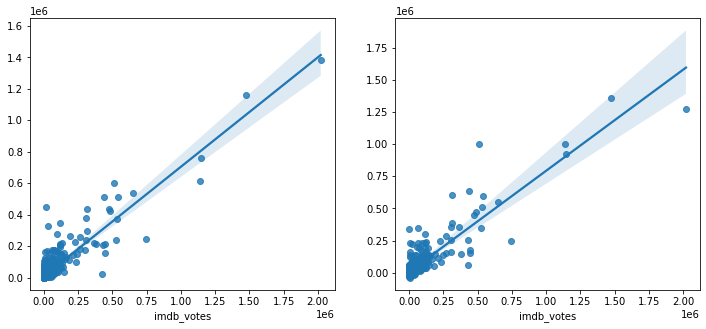

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sns.regplot(y_test, pred2, ax=ax[0])
sns.regplot(y_test, pred6, ax=ax[1])
plt.show()